# <center><h1 style="font-family: Times New Roman; color: black;">LGBM & XGBM</h1></center>

# Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 

# 1. Exploratory Data Analysis (EDA):
1. Load the Titanic dataset using Python's pandas library.
2. Check for missing values.
3. Explore data distributions using histograms and box plots.
4. Visualize relationships between features and survival using scatter plots and bar plots.

# 2. Data Preprocessing:
1. Impute missing values.
2. Encode categorical variables using one-hot encoding or label encoding. 
3. If needed you can apply more preprocessing methods on the given dataset.

# 3. Building Predictive Models:
1. Split the preprocessed dataset into training and testing sets.
2. Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3. Build predictive models using LightGBM and XGBoost algorithms.
4. Train the models on the training set and evaluate their performance on the testing set.
5. Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

# 4. Comparative Analysis:
1. Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2. Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

# Solutions:

# 1. Exploratory Data Analysis (EDA):

# 1.1: Load the Titanic dataset

In [1]:
# Import libraries
import pandas as pd

# Load Titanic dataset
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

# Display the first few rows of the training dataset to understand the structure
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# 1.2: Check for missing values

In [2]:
# Check for missing values in the training dataset
missing_values = train_df.isnull().sum()

# Display the missing values for each column
print("Missing Values:\n", missing_values)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# 1.3: Explore data distributions using histograms & Box Plots

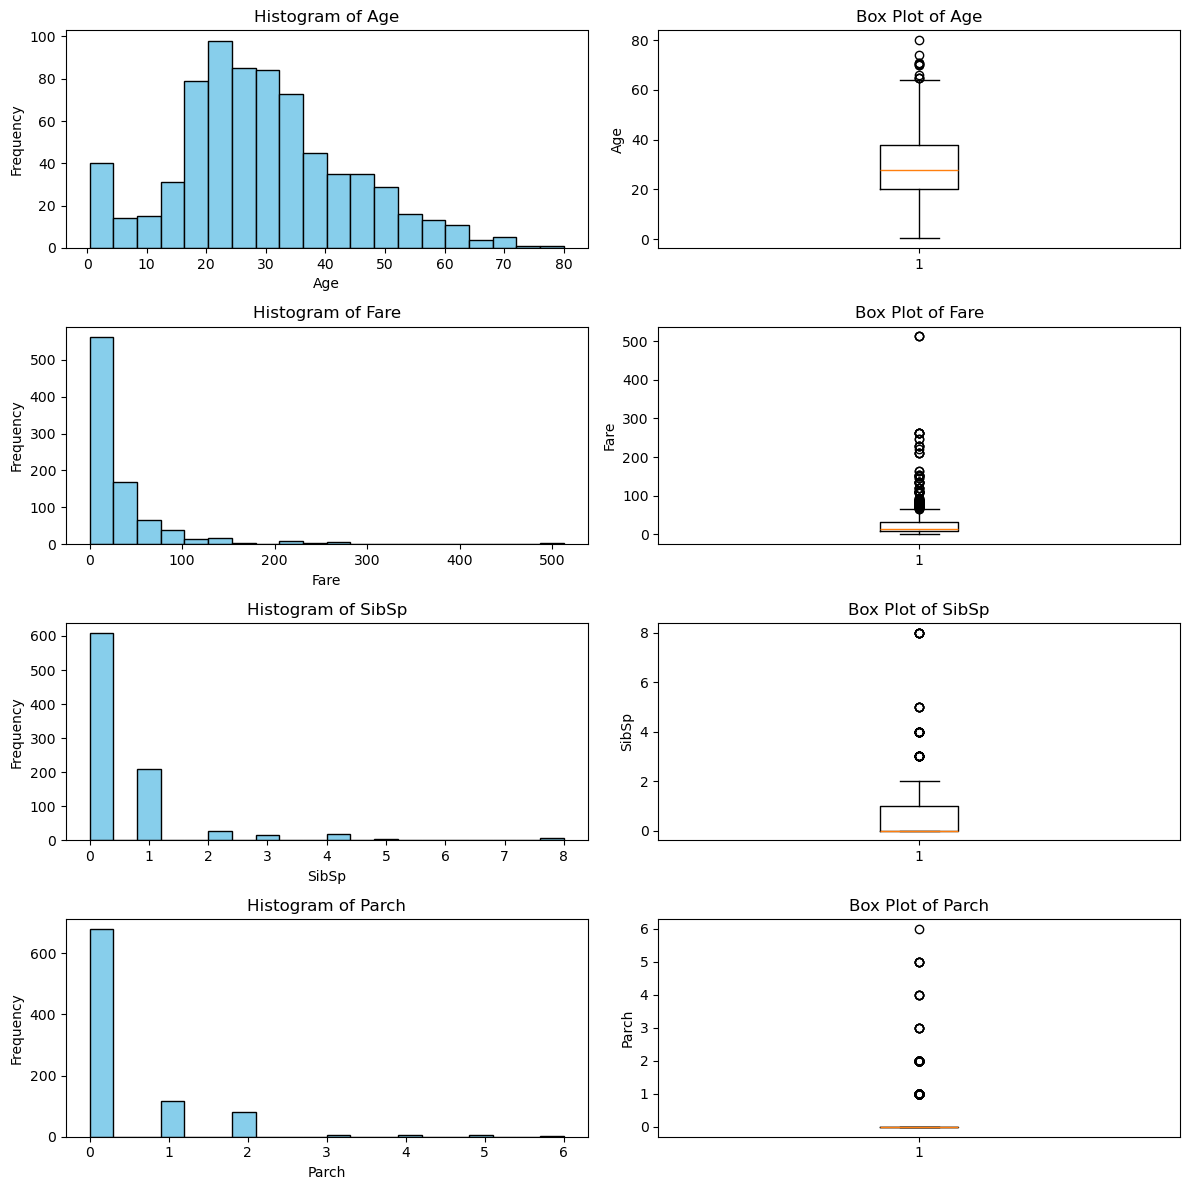

In [7]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# List of numerical features to plot histograms and box plots
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Plot histograms and box plots for each numerical feature
# This helps visualize the distribution of the data and detect potential outliers
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, 12))

for i, feature in enumerate(numerical_features):
    # Histogram
    axes[i, 0].hist(train_df[feature].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')
    
    # Box plot
    axes[i, 1].boxplot(train_df[feature].dropna())
    axes[i, 1].set_title(f'Box Plot of {feature}')
    axes[i, 1].set_ylabel(feature)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# 1.4: Visualize relationships (Scatter plot for Age vs Fare with survival status)

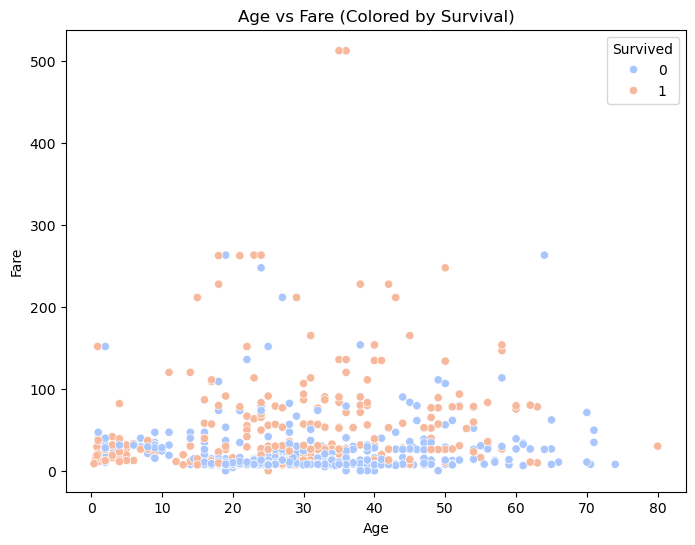

In [5]:
# Import additional visualization libraries
import seaborn as sns

# Scatter plot to visualize the relationship between Age and Fare, colored by survival status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Age vs Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# 1.5: Visualize relationships (Bar plots for categorical features)

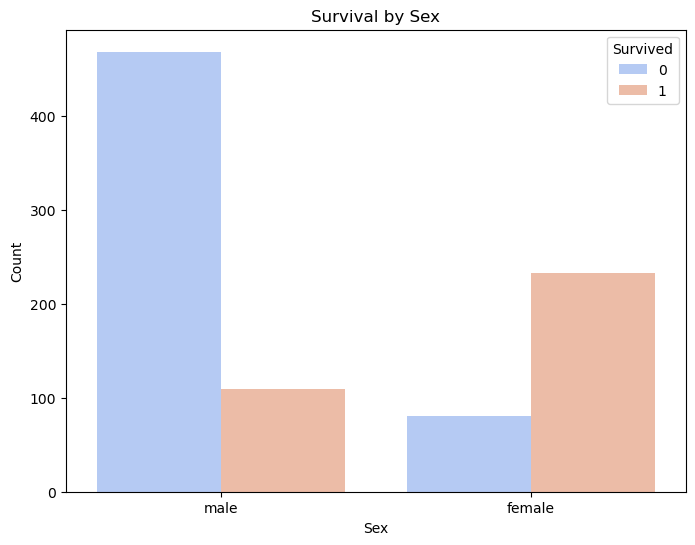

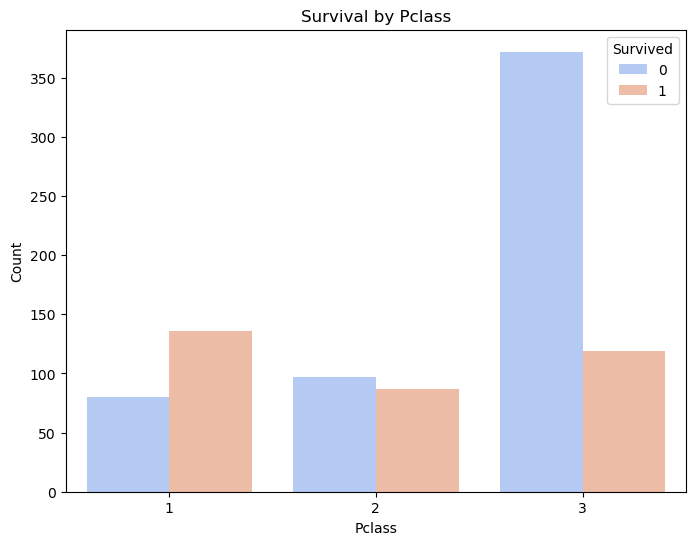

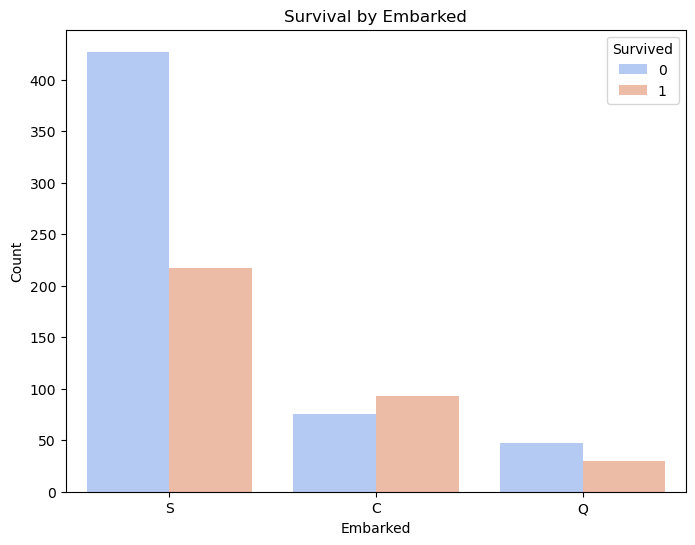

In [6]:
# Bar plots for categorical variables (Sex, Pclass, Embarked) to visualize their relationships with survival
categorical_features = ['Sex', 'Pclass', 'Embarked']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_df, x=feature, hue='Survived', palette='coolwarm')
    plt.title(f'Survival by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# 2. Data Preprocessing:

# 2.1: Impute missing values

In [9]:
# Fill missing 'Age' values with the median of the Age column
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# Fill missing 'Embarked' values with the most frequent value (mode)
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# For 'Cabin', create a new feature 'Cabin Missing' indicating whether the Cabin is missing or not
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Check if missing values have been handled
missing_values_after = train_df.isnull().sum()
print("Missing Values after Imputation:\n", missing_values_after)

Missing Values after Imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# 2.2: Encode categorical variables using One-Hot Encoding

In [10]:
# One-hot encode 'Sex', 'Pclass', and 'Embarked'
train_df = pd.get_dummies(train_df, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True)

# Display the first few rows to confirm encoding
train_df.head()

PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare  Cabin  Sex_male  Pclass_2  \
0  22.0      1      0         A/5 21171   7.2500      1      True     False   
1  38.0      1      0          PC 17599  71.2833      1     False     False   
2  26.0      0      0  STON/O2. 3101282   7.9250      1     False     False   
3  35.0      1      0            113803  53.1000      1     False     False   
4  35.0      0      0            373450   8.0500      1      True     False   

   Pclass_3  Embarked_Q  Embarked_S  
0      True       False        True  
1     False       False       False  
2      True       False        True  
3     False       False        True  
4      True       False        True

# 2.3: Additional preprocessing (Feature Scaling)

In [11]:
# Import Libraries
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling to 'Age' and 'Fare'
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])

# Display the first few rows after scaling
train_df[['Age', 'Fare']].head()

Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713

# 2.4: Split the dataset into training and testing sets

In [12]:
# Import Libraries
from sklearn.model_selection import train_test_split

# Define the target and features
X = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])  # Dropping columns not needed for modeling
y = train_df['Survived']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (712, 10)
X_test shape: (179, 10)
y_train shape: (712,)
y_test shape: (179,)


# 3. Building Predictive Models:

# 3.1: Split the preprocessed dataset into training and testing sets

In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define the target and features
X = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])  # Dropping columns not needed for modeling
y = train_df['Survived']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (712, 10)
X_test shape: (179, 10)
y_train shape: (712,)
y_test shape: (179,)


# 3.2: Choose appropriate evaluation metrics

In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForest instead of LightGBM

# Load the Titanic dataset (replace 'Titanic_train.csv' with your actual dataset path)
train_df = pd.read_csv('Titanic_train.csv')

# Preprocess the data (handle missing values and encode categorical variables)
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
train_df = pd.get_dummies(train_df, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True)

# Define features (X) and target (y)
X = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = train_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the RandomForest model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Define a function to evaluate models using the chosen metrics
def evaluate_model(y_test, predictions):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, zero_division=1)
    recall = recall_score(y_test, predictions, zero_division=1)
    f1 = f1_score(y_test, predictions, zero_division=1)

    # Print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Call the function to evaluate the RandomForest model
evaluate_model(y_test, rf_predictions)


Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639


# 3.3 & 3.4: LightGBM Model: Build, Train, and Evaluate

In [23]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the LightGBM model on the training set
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
lgb_predictions = lgb_model.predict(X_test)

# Evaluate the LightGBM model performance
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
lgb_precision = precision_score(y_test, lgb_predictions)
lgb_recall = recall_score(y_test, lgb_predictions)
lgb_f1 = f1_score(y_test, lgb_predictions)

# Display the evaluation metrics
print(f"LightGBM Accuracy: {lgb_accuracy:.4f}")
print(f"LightGBM Precision: {lgb_precision:.4f}")
print(f"LightGBM Recall: {lgb_recall:.4f}")
print(f"LightGBM F1 Score: {lgb_f1:.4f}")

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

# 3.3 & 3.4: XGBoost Model: Build, Train, and Evaluate

In [24]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model performance
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

# Display the evaluation metrics
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Precision: {xgb_precision:.4f}")
print(f"XGBoost Recall: {xgb_recall:.4f}")
print(f"XGBoost F1 Score: {xgb_f1:.4f}")

XGBoost Accuracy: 0.8212
XGBoost Precision: 0.8000
XGBoost Recall: 0.7568
XGBoost F1 Score: 0.7778


# 3.5: Use cross-validation and hyperparameter tuning

In [25]:
# Import necessary libraries for GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning LightGBM
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

# Initialize GridSearchCV for LightGBM
lgb_grid_search = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42), 
                               param_grid=lgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV for LightGBM
lgb_grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_lgb_params = lgb_grid_search.best_params_
best_lgb_score = lgb_grid_search.best_score_

print(f"Best LightGBM Params: {best_lgb_params}")
print(f"Best LightGBM CV Accuracy: {best_lgb_score:.4f}")

# Define hyperparameters for tuning XGBoost
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

# Initialize GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), 
                               param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV for XGBoost
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_xgb_params = xgb_grid_search.best_params_
best_xgb_score = xgb_grid_search.best_score_

print(f"Best XGBoost Params: {best_xgb_params}")
print(f"Best XGBoost CV Accuracy: {best_xgb_score:.4f}")

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

# 4. Comparative Analysis:

# 4.1 Comparative Analysis of LightGBM and XGBoost Models

In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

# Load the Titanic dataset (replace with actual dataset path)
train_df = pd.read_csv('Titanic_train.csv')

# Preprocess the data (handle missing values and encode categorical variables)
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
train_df = pd.get_dummies(train_df, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True)

# Define features (X) and target (y)
X = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = train_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LightGBM and XGBoost models
lgb_model = lgb.LGBMClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the LightGBM model
lgb_model.fit(X_train, y_train)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set using both models
lgb_predictions = lgb_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Define a function to evaluate models using the chosen metrics
def evaluate_model(y_test, predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, zero_division=1)
    recall = recall_score(y_test, predictions, zero_division=1)
    f1 = f1_score(y_test, predictions, zero_division=1)

    # Print the metrics for evaluation
    print(f"\n{model_name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Return the metrics for further comparison
    return accuracy, precision, recall, f1

# Evaluate both models
lgb_metrics = evaluate_model(y_test, lgb_predictions, "LightGBM")
xgb_metrics = evaluate_model(y_test, xgb_predictions, "XGBoost")

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

# 4.2 Visualize and Interpret the Results

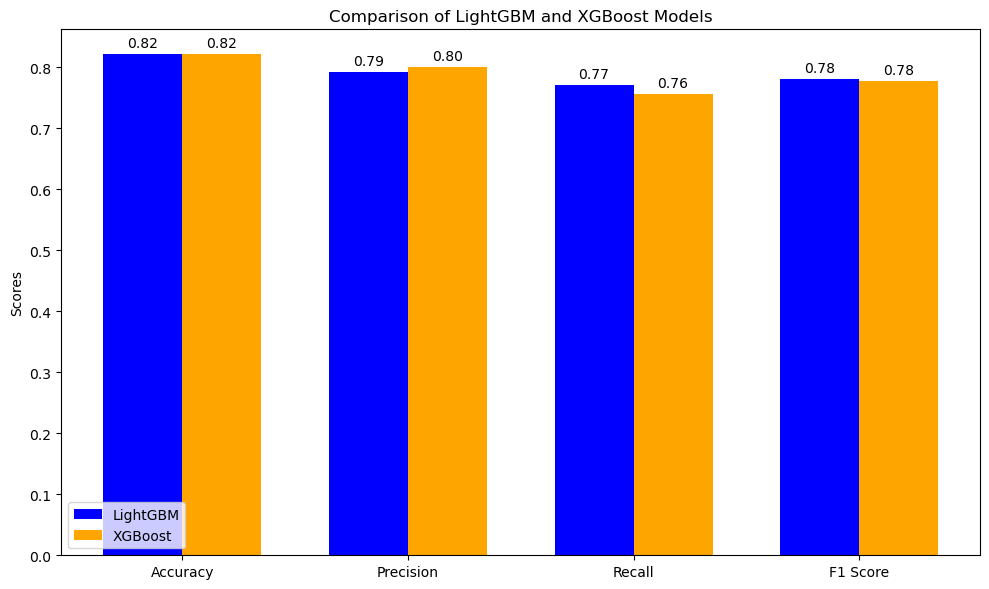

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Define metric names and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_scores = lgb_metrics
xgb_scores = xgb_metrics

# Set up the figure for comparison
x = np.arange(len(metrics))
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lgb_scores, width, label='LightGBM', color='blue')
rects2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='orange')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of LightGBM and XGBoost Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add text for labels, title, and axes ticks.
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # Label with score value
                    xy=(rect.get_x() + rect.get_width() / 2, height),  # Position at the top
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

<center>
    <h1 style="font-family: 'Cursive'; 
               font-size: 150px; 
               color: Yellow; 
               text-shadow: 0 0 10px #0000FF, 0 0 20px #0000FF, 0 0 30px #0000FF;">
        Thank You
    </h1>
</center>